# Reactions

In [ ]:
import festim as F
import numpy as np

my_model = F.HydrogenTransportProblem()

A = F.Species("A")
B = F.Species("B")
C = F.Species("C", mobile=False)
my_model.species = [A, B, C]

my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)

# assumes the same diffusivity for all species
material = F.Material(D_0=1, E_D=0)

vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)

my_model.subdomains = [vol, left_surf, right_surf]

my_model.reactions = [
    F.Reaction(
        reactant=[A, B],
        product=[C],
        k_0=0.5,
        E_k=0,
        p_0=1,
        E_p=0,
        volume=vol,
    )
]

my_model.boundary_conditions = [
    # A BCs
    F.FixedConcentrationBC(left_surf, value=10, species=A),
    F.FixedConcentrationBC(right_surf, value=0, species=A),
    # B BCs
    F.FixedConcentrationBC(left_surf, value=0, species=B),
    F.FixedConcentrationBC(right_surf, value=5, species=B),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=50)

my_model.settings.stepsize = F.Stepsize(1)

In [32]:
my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/50.0 [00:00<?, ?it/s]

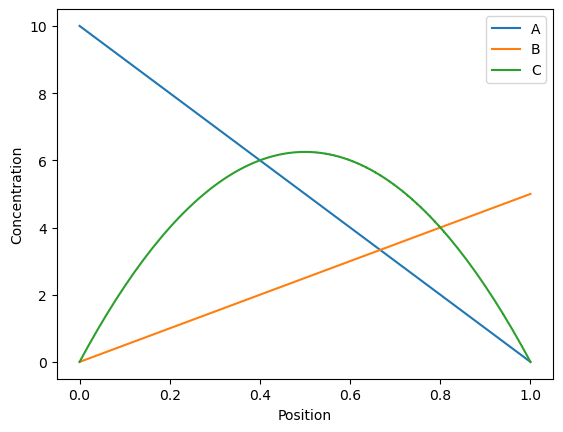

In [ ]:
import matplotlib.pyplot as plt

def plot_profile(species, **kwargs):
    index = my_model.species.index(species)
    V0, dofs = my_model.function_space.sub(index).collapse()
    coords = V0.tabulate_dof_coordinates()[:, 0]
    sort_coords = np.argsort(coords)
    c = my_model.u.x.array[dofs][sort_coords]
    x = coords[sort_coords]
    return plt.plot(x, c, **kwargs)

for species in my_model.species:
    plot_profile(species, label=species.name)

plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()